## Was the Laker's Defense Horrible This Year?

Many fans have been vocally critical about the Laker's defensive abilities this year. Namely, they've made trades that fans have deemed were "good defensive players" and have traded for players who are more offense-oriented as opposed to defense-oriented. 

One of the most direct ways of assessing a team's defensive abilities is to look at how much the opposing team scored against the team in each game. If you have good defense, you should be stopping the other team from scoring points. Therefore, we looked at the historic games the Lakers have played, and look at how many points the opposing team has scored against the Lakers (going back five years). We chose five years as our range because if we go further back, we may see huge variances in team's abilities. For example, the Detroit Pistons are not very good currently, but were championship contenders in the 1980s. We are also operating under the assumption that the opposing team have the same capabilities throughout the five years we are looking at. 

We used a Kaggle dataset ([here](https://www.kaggle.com/datasets/nathanlauga/nba-games)) for data on all NBA games from the 2004 season to the 2021 season.  

In [3]:
import pandas as pd

games = pd.read_csv("../Datasets/Defense/games.csv")

games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


Now, we want to extract all the games that the Laker's were apart of (both home games and visiting games). We first find the team ID for the Lakers by examining the "game_details.csv" file also made available to us through Kaggle. Afterwards, we filter for Lakers games.  

We also noted that we want to look at data from the five seasons prior to the 2021 season to benchmark the Laker's defensive abilities in 2021. Therefore, we filter for that as well. 

In [8]:
LAKERS_TEAM_ID = 1610612747

laker_games = games.loc[(games["HOME_TEAM_ID"] == LAKERS_TEAM_ID) | (games["VISITOR_TEAM_ID"] == LAKERS_TEAM_ID)]

laker_games_last_five = laker_games[laker_games["SEASON"] > 2015]

laker_games_last_five

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
16,2022-03-11,22101004,Final,1610612747,1610612764,2021,1610612747,122.0,0.527,0.706,...,25.0,37.0,1610612764,109.0,0.459,0.667,0.333,21.0,47.0,1
23,2022-03-09,22100985,Final,1610612745,1610612747,2021,1610612745,139.0,0.510,0.947,...,25.0,50.0,1610612747,130.0,0.465,0.692,0.383,25.0,48.0,1
42,2022-03-07,22100973,Final,1610612759,1610612747,2021,1610612759,117.0,0.548,0.533,...,28.0,47.0,1610612747,110.0,0.473,0.696,0.308,19.0,43.0,1
58,2022-03-05,22100959,Final,1610612747,1610612744,2021,1610612747,124.0,0.494,0.857,...,25.0,47.0,1610612744,116.0,0.500,0.474,0.441,22.0,41.0,1
74,2022-03-03,22100945,Final,1610612746,1610612747,2021,1610612746,132.0,0.548,0.867,...,32.0,46.0,1610612747,111.0,0.488,0.773,0.343,26.0,36.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22914,2016-10-13,11600058,Final,1610612747,1610612758,2016,1610612747,104.0,0.465,0.714,...,31.0,31.0,1610612758,116.0,0.587,0.789,0.619,31.0,37.0,0
22923,2016-10-11,11600047,Final,1610612747,1610612757,2016,1610612747,106.0,0.432,0.615,...,19.0,46.0,1610612757,109.0,0.448,0.690,0.407,23.0,54.0,0
22930,2016-10-09,11600036,Final,1610612747,1610612743,2016,1610612747,124.0,0.531,0.706,...,18.0,29.0,1610612743,115.0,0.476,0.689,0.273,21.0,54.0,1
22939,2016-10-07,11600028,Final,1610612747,1610612743,2016,1610612747,97.0,0.394,0.591,...,21.0,47.0,1610612743,101.0,0.354,0.900,0.222,25.0,60.0,0


Looks like we have 522 Laker games to look at! First, let's tidy up this data a bit. Since we now have just Lakers data, we don't really want to keep looking at HOME_TEAM_ID and VISITING_TEAM_ID. We would much rather look at a column containing OPPOSING_TEAM_ID. Additionally, we have a HOME_TEAM_WINS column that we would like to convert into a LAKERS_WIN column. Also, we want to create OPPOSING_TEAM_SCORE since our current dataframe only has PTS_home and PTS_away. 

Let's make those columns now!

In [9]:
def get_opposing_team (row):
    if row["HOME_TEAM_ID"] == LAKERS_TEAM_ID:
        return row["VISITOR_TEAM_ID"]
    else:
        return row["HOME_TEAM_ID"]

laker_games_last_five["OPPOSING_TEAM_ID"] = laker_games_last_five.apply( lambda row: get_opposing_team(row), axis = 1)

def get_lakers_win (row):
    if row["HOME_TEAM_ID"] == LAKERS_TEAM_ID:
        return row["HOME_TEAM_WINS"]
    else:
        return 1 if (row["HOME_TEAM_WINS"] == 0) else 0

laker_games_last_five["LAKERS_WIN"] = laker_games_last_five.apply( lambda row: get_lakers_win(row), axis = 1)

def get_opposing_team_score (row):
    if row["HOME_TEAM_ID"] == LAKERS_TEAM_ID:
        return row["PTS_away"]
    else:
        return row["PTS_home"]

laker_games_last_five["OPPOSING_PTS"] = laker_games_last_five.apply( lambda row: get_opposing_team_score(row), axis = 1)

laker_games_last_five

C:\Users\andre\AppData\Local\Temp\ipykernel_25468\3801629057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laker_games_last_five["OPPOSING_TEAM_ID"] = laker_games_last_five.apply( lambda row: get_opposing_team(row), axis = 1)
C:\Users\andre\AppData\Local\Temp\ipykernel_25468\3801629057.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laker_games_last_five["LAKERS_WIN"] = laker_games_last_five.apply( lambda row: get_lakers_win(row), axis = 1)
C:\Users\andre\AppData\Local\Temp\ipykernel_25468\380162

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,OPPOSING_TEAM_ID,LAKERS_WIN,OPPOSING_PTS
16,2022-03-11,22101004,Final,1610612747,1610612764,2021,1610612747,122.0,0.527,0.706,...,109.0,0.459,0.667,0.333,21.0,47.0,1,1610612764,1,109.0
23,2022-03-09,22100985,Final,1610612745,1610612747,2021,1610612745,139.0,0.510,0.947,...,130.0,0.465,0.692,0.383,25.0,48.0,1,1610612745,0,139.0
42,2022-03-07,22100973,Final,1610612759,1610612747,2021,1610612759,117.0,0.548,0.533,...,110.0,0.473,0.696,0.308,19.0,43.0,1,1610612759,0,117.0
58,2022-03-05,22100959,Final,1610612747,1610612744,2021,1610612747,124.0,0.494,0.857,...,116.0,0.500,0.474,0.441,22.0,41.0,1,1610612744,1,116.0
74,2022-03-03,22100945,Final,1610612746,1610612747,2021,1610612746,132.0,0.548,0.867,...,111.0,0.488,0.773,0.343,26.0,36.0,1,1610612746,0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22914,2016-10-13,11600058,Final,1610612747,1610612758,2016,1610612747,104.0,0.465,0.714,...,116.0,0.587,0.789,0.619,31.0,37.0,0,1610612758,0,116.0
22923,2016-10-11,11600047,Final,1610612747,1610612757,2016,1610612747,106.0,0.432,0.615,...,109.0,0.448,0.690,0.407,23.0,54.0,0,1610612757,0,109.0
22930,2016-10-09,11600036,Final,1610612747,1610612743,2016,1610612747,124.0,0.531,0.706,...,115.0,0.476,0.689,0.273,21.0,54.0,1,1610612743,1,115.0
22939,2016-10-07,11600028,Final,1610612747,1610612743,2016,1610612747,97.0,0.394,0.591,...,101.0,0.354,0.900,0.222,25.0,60.0,0,1610612743,0,101.0


In [10]:
cleaned_lakers = laker_games_last_five[['GAME_DATE_EST', 'GAME_ID', 'SEASON', 'OPPOSING_TEAM_ID', 'LAKERS_WIN', 'OPPOSING_PTS']].copy()

cleaned_lakers

,GAME_DATE_EST,GAME_ID,SEASON,OPPOSING_TEAM_ID,LAKERS_WIN,OPPOSING_PTS
16,2022-03-11,22101004,2021,1610612764,1,109.0
23,2022-03-09,22100985,2021,1610612745,0,139.0
42,2022-03-07,22100973,2021,1610612759,0,117.0
58,2022-03-05,22100959,2021,1610612744,1,116.0
74,2022-03-03,22100945,2021,1610612746,0,132.0
...,...,...,...,...,...,...
22914,2016-10-13,11600058,2016,1610612758,0,116.0
22923,2016-10-11,11600047,2016,1610612757,0,109.0
22930,2016-10-09,11600036,2016,1610612743,1,115.0
22939,2016-10-07,11600028,2016,1610612743,0,101.0


Text(0.5, 1.0, 'Scores of All Teams Faced by the Lakers in the Past Five Seasons')

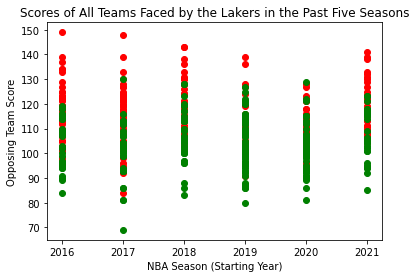

In [25]:
import matplotlib.pyplot as plt

wins_df = cleaned_lakers[cleaned_lakers["LAKERS_WIN"] == 1]  
lose_df = cleaned_lakers[cleaned_lakers["LAKERS_WIN"] == 0]
plt.scatter(lose_df["SEASON"], lose_df["OPPOSING_PTS"], color = 'red')  
plt.scatter(wins_df["SEASON"], wins_df["OPPOSING_PTS"], color = 'green')

plt.xlabel("NBA Season (Starting Year)")
plt.ylabel("Opposing Team Score")
plt.title('Scores of All Teams Faced by the Lakers in the Past Five Seasons')



A quick look at our scatter plot confirms the relationship between the opposing team's score and the team's chance of winning - if the opposing team scores less, than your team would more likely win. To better see the distribution of points, let's add jitter to the points so that points are not overlapping!

Text(0.5, 1.0, 'Scores of All Teams Faced by the Lakers in the Past Five Seasons')

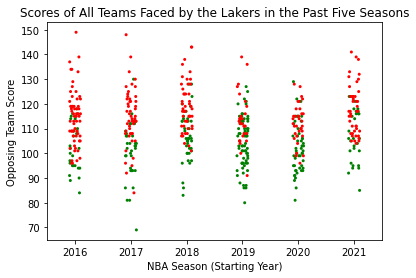

In [37]:
import seaborn as sns

jitter_graph = sns.stripplot(data =wins_df, x="SEASON", y="OPPOSING_PTS", jitter=0.1, size=3, color = 'green')
jitter_graph = sns.stripplot(data =lose_df, x="SEASON", y="OPPOSING_PTS", jitter=0.1, size=3, color = 'red')

jitter_graph.set_xlabel("NBA Season (Starting Year)")
jitter_graph.set_ylabel("Opposing Team Score")
jitter_graph.set_title('Scores of All Teams Faced by the Lakers in the Past Five Seasons')

We must also note that some teams are simply better than others - we can't expect to compare the Laker's ability to defend against reigning conference champions against their ability to defend against teams who've not made the playoffs in years. Therefore, we choose to look at the Laker's performance against each team over the past five seasons instead. Let's calculate the average points scored against the Lakers by team per season!

In [50]:
unique_years = cleaned_lakers["SEASON"].unique()
teams = cleaned_lakers["OPPOSING_TEAM_ID"].unique()

team_score_map = {}
for team in teams:
    team_df = cleaned_lakers[cleaned_lakers.OPPOSING_TEAM_ID == team]
    scores_per_year = {}
    for year  in unique_years:
        curr_df = team_df[team_df.SEASON == year]
        average_score = curr_df["OPPOSING_PTS"].mean()
        scores_per_year[year] = average_score
    team_score_map[team] = scores_per_year

team_score_map

{1610612764: {2021: 109.0,
  2020: 121.5,
  2019: 109.5,
  2018: 117.0,
  2017: 105.0,
  2016: 117.5},
 1610612745: {2021: 116.0,
  2020: 108.0,
  2019: 108.5,
  2018: 123.5,
  2017: 121.75,
  2016: 129.0},
 1610612759: {2021: 120.5,
  2020: 109.33333333333333,
  2019: 100.66666666666667,
  2018: 124.75,
  2017: 101.66666666666667,
  2016: 116.0},
 1610612744: {2021: 117.2,
  2020: 100.75,
  2019: 102.28571428571429,
  2018: 112.0,
  2017: 118.25,
  2016: 116.5},
 1610612746: {2021: 116.75,
  2020: 105.0,
  2019: 106.75,
  2018: 114.2,
  2017: 110.6,
  2016: 115.75},
 1610612742: {2021: 106.5,
  2020: 112.66666666666667,
  2019: 108.2,
  2018: 104.33333333333333,
  2017: 106.5,
  2016: 113.5},
 1610612740: {2021: 123.0,
  2020: 107.0,
  2019: 111.5,
  2018: 113.25,
  2017: 128.66666666666666,
  2016: 101.25},
 1610612762: {2021: 98.0,
  2020: 113.33333333333333,
  2019: 96.66666666666667,
  2018: 105.0,
  2017: 107.5,
  2016: 100.25},
 1610612757: {2021: 103.0,
  2020: 104.666666666666

Let's create a dataframe from this hashmap now. We want a Year column, Team column, as well as an Average Points Score column. 

In [51]:
avg_score_df = pd.DataFrame.from_records(team_score_map)

avg_score_df

,1610612737,1610612738,1610612739,1610612740,1610612741,1610612742,1610612743,1610612744,1610612745,1610612746,...,1610612757,1610612758,1610612759,1610612760,1610612761,1610612762,1610612763,1610612764,1610612765,1610612766
2021,123.5,116.0,101.0,123.000000,118.0,106.500000,133.000000,117.200000,116.00,116.75,...,103.000000,117.600000,120.500000,108.333333,NaN,98.000000,114.250000,109.0,111.0,120.0
2020,99.0,108.0,97.0,107.000000,102.5,112.666667,101.333333,100.750000,108.00,105.00,...,104.666667,109.000000,109.333333,108.000000,111.0,113.333333,97.000000,121.5,118.0,99.0
2019,98.5,125.5,99.0,111.500000,112.0,108.200000,111.888889,102.285714,108.50,106.75,...,111.625000,115.333333,100.666667,112.250000,110.0,96.666667,102.250000,109.5,99.0,101.0
2018,111.5,124.0,103.0,113.250000,103.5,104.333333,116.600000,112.000000,123.50,114.20,...,114.750000,109.200000,124.750000,118.000000,116.0,105.000000,101.666667,117.0,105.5,107.5
2017,108.5,107.0,117.0,128.666667,98.5,106.500000,114.500000,118.250000,121.75,110.60,...,105.333333,92.000000,101.666667,108.000000,112.0,107.500000,106.750000,105.0,102.5,103.5
2016,105.0,114.0,122.0,101.250000,104.0,113.500000,117.600000,116.500000,129.00,115.75,...,107.400000,99.666667,116.000000,110.666667,118.0,100.250000,102.666667,117.5,111.5,113.0


In [52]:
year = [2021, 2020, 2019, 2018, 2017, 2016]
avg_score_df["Year"] = year
avg_score_df

,1610612737,1610612738,1610612739,1610612740,1610612741,1610612742,1610612743,1610612744,1610612745,1610612746,...,1610612758,1610612759,1610612760,1610612761,1610612762,1610612763,1610612764,1610612765,1610612766,Year
2021,123.5,116.0,101.0,123.000000,118.0,106.500000,133.000000,117.200000,116.00,116.75,...,117.600000,120.500000,108.333333,NaN,98.000000,114.250000,109.0,111.0,120.0,2021
2020,99.0,108.0,97.0,107.000000,102.5,112.666667,101.333333,100.750000,108.00,105.00,...,109.000000,109.333333,108.000000,111.0,113.333333,97.000000,121.5,118.0,99.0,2020
2019,98.5,125.5,99.0,111.500000,112.0,108.200000,111.888889,102.285714,108.50,106.75,...,115.333333,100.666667,112.250000,110.0,96.666667,102.250000,109.5,99.0,101.0,2019
2018,111.5,124.0,103.0,113.250000,103.5,104.333333,116.600000,112.000000,123.50,114.20,...,109.200000,124.750000,118.000000,116.0,105.000000,101.666667,117.0,105.5,107.5,2018
2017,108.5,107.0,117.0,128.666667,98.5,106.500000,114.500000,118.250000,121.75,110.60,...,92.000000,101.666667,108.000000,112.0,107.500000,106.750000,105.0,102.5,103.5,2017
2016,105.0,114.0,122.0,101.250000,104.0,113.500000,117.600000,116.500000,129.00,115.75,...,99.666667,116.000000,110.666667,118.0,100.250000,102.666667,117.5,111.5,113.0,2016


Text(0.5, 1.0, 'Scores of All Teams Faced by the Lakers in the Past Five Seasons')

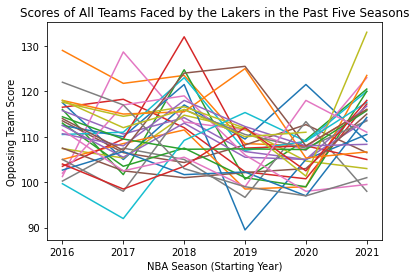

In [55]:
for team in teams:
    plt.plot(avg_score_df["Year"], avg_score_df[team]) 

plt.xlabel("NBA Season (Starting Year)")
plt.ylabel("Opposing Team Score")
plt.title('Scores of All Teams Faced by the Lakers in the Past Five Seasons') 

Looking at the graph (just a visual glance), we see that most teams had a scoring dip against the Lakers in 2019 (the season the Lakers were champions) and a scoring increase in the 2021-22 season. Now, let's actually make this more scientific. Was the 2021-22 opposing team scores statistically significantly different than what teams did for the past five season prior to 2021?

Text(0.5, 1.0, 'Defensive Box +/- Score for Russell Westbrook Over His Career')

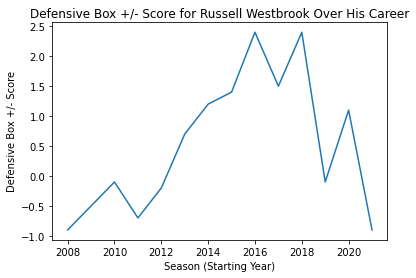

In [56]:
westbrook_advanced_stats = pd.read_csv("../Datasets/Westbrook Stuff/westbrook_advanced.csv")

plt.plot(westbrook_advanced_stats["Season_Start"], westbrook_advanced_stats["DBPM"])
plt.xlabel("Season (Starting Year)")
plt.ylabel("Defensive Box +/- Score")
plt.title('Defensive Box +/- Score for Russell Westbrook Over His Career')